In [1]:
cd /home/nbyrnes/code/resonance

/home/nbyrnes/code/resonance


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import functools
import scipy
from tqdm import tqdm
import sphere
import poles
import bessel
import material
import multilayer
import coated_sphere

In [3]:
# Parameters for the coated sphere
r_core_min = 1e-9
r_core_max = 65e-9
num_r_core = 1 * 10**3

r_shell_min = 0.5e-9
r_shell_max = 6.5e-9
num_r_shell = 1 * 10**3

middle_index_core = int(num_r_core *1 / 4)
middle_index_shell = int(num_r_shell / 2)

n_func_core = material.get_n_silica
n_func_coating = material.get_n_gold_drude_lorentz
n_func_background = material.get_n_water()
n_func_list = [n_func_core, n_func_coating, n_func_background]

multipole_order = 1

In [4]:
r_core_values = np.linspace(r_core_min, r_core_max, num_r_core)
r_shell_values = np.linspace(r_shell_min, r_shell_max, num_r_shell)
R_CORE, R_SHELL = np.meshgrid(r_core_values, r_shell_values)

In [6]:
pole_grid = np.load('pole_grid.npy')
sensitivity_real = np.load("sensitivity_real.npy")
sensitivity_data = np.load("sensitivity_data.npy")

r core: 1e-09   6.5e-08
r shell: 5e-10   6.5e-09
104 181
r_core = 1.2595595595595597e-08
r_shell = 1.1246246246246246e-09
pole = (0.6451178777366504-0.022732616856629733j)
l = 973.9592598524303
11.431744500185612


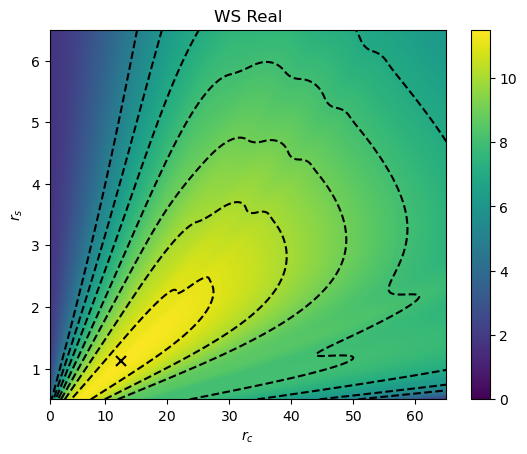

In [7]:
fig, ax = plt.subplots()
im = ax.imshow(
    np.abs(sensitivity_data.real / pole_grid.imag),
    extent=(R_CORE[0, 0], R_CORE[0, -1], R_SHELL[0, 0], R_SHELL[-1, 0]),
    origin="lower",
    vmin=0,
    vmax=11.5
)
ax.set_aspect("auto")
ax.set_title(r"WS Real")
ax.set_xlabel(r"$r_c$")
ax.set_ylabel(r"$r_s$")
cbar = fig.colorbar(im, ax=ax)
contour_levels = [5,6,7,8, 9, 10, 11]
contours = ax.contour(
    R_CORE,
    R_SHELL,
    np.abs(sensitivity_data.real / pole_grid.imag),
    levels=contour_levels,  # Set the number of contour levels, or define specific levels
    colors="black",  # Set contour color
    linestyles="dashed",
)
print(f"r core: {r_core_min}   {r_core_max}")
print(f"r shell: {r_shell_min}   {r_shell_max}")
u, v = np.where(np.isclose(np.abs(sensitivity_data.real / pole_grid.imag), np.max(np.abs(sensitivity_data.real / pole_grid.imag))))
u, v = u[0], v[0]
print(u, v)
print(f"r_core = {R_CORE[u,v]}")
print(f"r_shell = {R_SHELL[u,v]}")
print(f"pole = {pole_grid[u,v]/1e7}")
cross_x = R_CORE[u,v]
cross_y = R_SHELL[u,v]
ax.plot(cross_x, cross_y, marker='x', markersize=7, color='black', markeredgewidth=1.5)  # Plot 'x' at the desired point
# ax.plot([r_core_min, cross_x], [cross_y, cross_y], color='red', linewidth=1)  # Left horizontal
# ax.plot([cross_x, cross_x], [r_shell_min, cross_y], color='red', linewidth=1)  # Left horizontal
r_core_optimal_ws = R_CORE[u,v]
r_shell_optimal_ws = R_SHELL[u,v]

l = 2*np.pi/pole_grid[u,v].real
print(f"l = {l/1e-9}")
print(np.max(np.abs(sensitivity_data.real / pole_grid.imag)))

ax.set_xticks(np.array([0.1,1,2,3,4,5,6])*1e-8)
ax.set_xticklabels(["0","10","20","30","40","50","60"])
ax.set_yticks(np.array([1,2,3,4,5,6])*1e-9)
ax.set_yticklabels(["1","2","3","4","5","6"])


# # Plot mini
# mini_d = 0.5
# mini_x = R_CORE[int(u*mini_d), int(v*mini_d)]
# mini_y = R_SHELL[int(u*mini_d), int(v*mini_d)]
# ax.plot(mini_x, mini_y, marker='v', markersize=7, color='darkred', markeredgewidth=1.5)  # Plot 'x' at the desired point

# # Plot mega
# mega_d = 1.75
# mega_x = R_CORE[int(u*mega_d), int(v*mega_d)]
# mega_y = R_SHELL[int(u*mega_d), int(v*mega_d)]
# ax.plot(mega_x, mega_y, marker='^', markersize=7, color='darkred', markeredgewidth=1.5)  # Plot 'x' at the desired point

plt.savefig('fomws.svg', dpi=300, bbox_inches='tight')


358 83
r_core = 6.317317317317318e-09
r_shell = 2.6501501501501503e-09
pole = (1.0126453417577121-0.05806163248795841j)
0.9440743980617039
5.859309352015671e-07


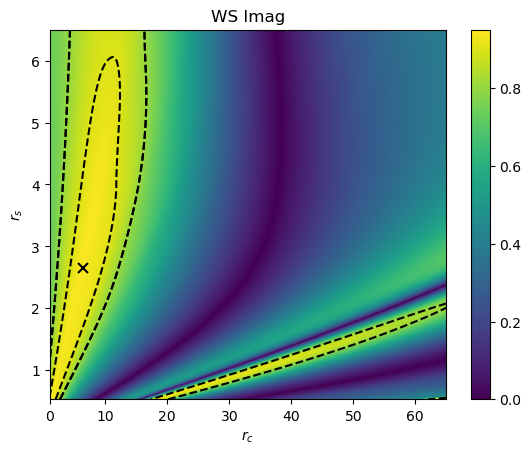

In [58]:
fig, ax = plt.subplots()
plot_data = np.abs(sensitivity_data.imag / pole_grid.imag)[5:, :]
im = ax.imshow(
    plot_data,
    extent=(R_CORE[5, 0], R_CORE[0, -1], R_SHELL[5, 0], R_SHELL[-1, 0]),
    origin="lower",
    vmin=0,
    vmax=0.95,
)
ax.set_aspect("auto")
ax.set_title(r"WS Imag")
ax.set_xlabel(r"$r_c$")
ax.set_ylabel(r"$r_s$")
cbar = fig.colorbar(im, ax=ax)
contour_levels = [5, 6, 7, 8, 9, 10, 11]
# contours = ax.contour(
#     R_CORE,
#     R_SHELL,
#     np.abs(sensitivity_data.real / pole_grid.imag),
#     levels=contour_levels,  # Set the number of contour levels, or define specific levels
#     colors="black",  # Set contour color
#     linestyles="dashed",
# )
# print(f"r core: {r_core_min}   {r_core_max}")
# print(f"r shell: {r_shell_min}   {r_shell_max}")
u, v = np.where(
    np.isclose(
        np.abs(sensitivity_data.imag / pole_grid.imag)[10:],
        np.max(np.abs(sensitivity_data.imag / pole_grid.imag)[10:]),
    )
)
u, v = u[0], v[0]
print(u, v)
print(f"r_core = {R_CORE[u,v]}")
print(f"r_shell = {R_SHELL[u,v]}")
print(f"pole = {pole_grid[u,v]/1e7}")
cross_x = R_CORE[u, v]
cross_y = R_SHELL[u, v]
ax.plot(
    cross_x,
    cross_y,
    marker="x",
    markersize=7,
    color="black",
    markeredgewidth=1.5,
)  # Plot 'x' at the desired point
# # ax.plot([r_core_min, cross_x], [cross_y, cross_y], color='red', linewidth=1)  # Left horizontal
# # ax.plot([cross_x, cross_x], [r_shell_min, cross_y], color='red', linewidth=1)  # Left horizontal
# r_core_optimal_ws = R_CORE[u,v]
# r_shell_optimal_ws = R_SHELL[u,v]

# l = 2*np.pi/pole_grid[u,v].real
# print(f"l = {l/1e-9}")
# print(np.max(np.abs(sensitivity_data.real / pole_grid.imag)))
# u, v = np.where(np.isclose(plot_data, np.max(plot_data)))
# u, v = u[0], v[0]
# print(u, v)
# print(f"r_core = {R_CORE[u,v]}")
# print(f"r_shell = {R_SHELL[u,v]}")
# print(f"pole = {pole_grid[u,v]/1e7}")
# print(f"val = {plot_data[u,v]}")
# cross_x = R_CORE[u,v]
# cross_y = R_SHELL[u,v]
# ax.plot(cross_x, cross_y, marker='x', markersize=7, color='black', markeredgewidth=1.5)  # Plot 'x' at the desired point

ax.set_xticks(np.array([0.1, 1, 2, 3, 4, 5, 6]) * 1e-8)
ax.set_xticklabels(["0", "10", "20", "30", "40", "50", "60"])
ax.set_yticks(np.array([1, 2, 3, 4, 5, 6]) * 1e-9)
ax.set_yticklabels(["1", "2", "3", "4", "5", "6"])

contour_levels = [0.8, 0.9]
contour_colors= ["black", "black"]
up_lim=250
contours = ax.contour(
    R_CORE[5:,0:up_lim],
    R_SHELL[5:,0:up_lim],
    plot_data[:,0:up_lim],
    levels=contour_levels,  # Set the number of contour levels, or define specific levels
    colors=contour_colors,  # Set contour color
    linestyles="dashed",
)

contour_levels = [0.8]
contour_colors= ["black"]
up_lim=250
contours = ax.contour(
    R_CORE[5:],
    R_SHELL[5:],
    plot_data,
    levels=contour_levels,  # Set the number of contour levels, or define specific levels
    colors=contour_colors,  # Set contour color
    linestyles="dashed",
)

# # Plot mini
# mini_d = 0.5
# mini_x = R_CORE[int(u*mini_d), int(v*mini_d)]
# mini_y = R_SHELL[int(u*mini_d), int(v*mini_d)]
# ax.plot(mini_x, mini_y, marker='v', markersize=7, color='darkred', markeredgewidth=1.5)  # Plot 'x' at the desired point

# # Plot mega
# mega_d = 1.75
# mega_x = R_CORE[int(u*mega_d), int(v*mega_d)]
# mega_y = R_SHELL[int(u*mega_d), int(v*mega_d)]
# ax.plot(mega_x, mega_y, marker='^', markersize=7, color='darkred', markeredgewidth=1.5)  # Plot 'x' at the desired point

plt.savefig("fomws_imag.svg", dpi=300, bbox_inches="tight")
print(np.max(np.abs(sensitivity_data.imag / pole_grid.imag)[10:]))
print(np.min(np.abs(sensitivity_data.imag / pole_grid.imag)[10:]))

---
118 193
r_core = 1.3364364364364366e-08
r_shell = 1.2087087087087087e-09
pole = (6479741.462436025-228451.6456425454j)


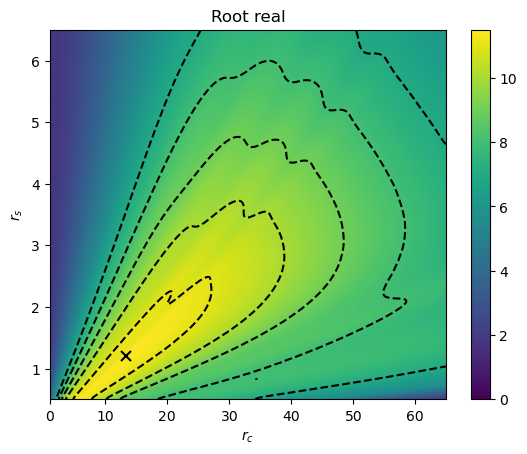

In [76]:
fig, ax = plt.subplots()
im = ax.imshow(
    np.abs(sensitivity_real.real / pole_grid.imag),
    extent=(R_CORE[0, 0], R_CORE[0, -1], R_SHELL[0, 0], R_SHELL[-1, 0]),
    origin="lower",
    vmin=0,
    vmax=11.5,
)
ax.set_aspect("auto")
ax.set_title(r"Root real")
ax.set_xlabel(r"$r_c$")
ax.set_ylabel(r"$r_s$")
cbar = fig.colorbar(im, ax=ax)
contour_levels = [7, 8, 9, 10, 11]
contours = ax.contour(
    R_CORE,
    R_SHELL,
    scipy.ndimage.gaussian_filter(
        np.abs(sensitivity_real.real / pole_grid.imag), sigma=5
    ),
    levels=contour_levels,  # Set the number of contour levels, or define specific levels
    colors="black",  # Set contour color
    linestyles="dashed",
)
# plt.savefig('heat.svg', dpi=300, bbox_inches='tight')
# Find the peak
print("---")
u, v = np.where(
    np.isclose(
        np.abs(sensitivity_real.real / pole_grid.imag),
        np.max(np.abs(sensitivity_real.real / pole_grid.imag)),
    )
)
u, v = u[0], v[0]
print(u, v)
print(f"r_core = {R_CORE[u,v]}")
print(f"r_shell = {R_SHELL[u,v]}")
print(f"pole = {pole_grid[u,v]}")
cross_x = R_CORE[u, v]
cross_y = R_SHELL[u, v]
ax.plot(
    cross_x,
    cross_y,
    marker="x",
    markersize=7,
    color="black",
    markeredgewidth=1.5,
)  # Plot 'x' at the desired point
ax.set_xticks(np.array([0.1, 1, 2, 3, 4, 5, 6]) * 1e-8)
ax.set_xticklabels(["0", "10", "20", "30", "40", "50", "60"])
ax.set_yticks(np.array([1, 2, 3, 4, 5, 6]) * 1e-9)
ax.set_yticklabels(["1", "2", "3", "4", "5", "6"])
# # Plot mini
# mini_d = 0.8
# mini_x = R_CORE[int(u*mini_d), int(v*mini_d)]
# mini_y = R_SHELL[int(u*mini_d), int(v*mini_d)]
# ax.plot(mini_x, mini_y, marker='v', markersize=7, color='darkred', markeredgewidth=1.5)  # Plot 'x' at the desired point

# # Plot mega
# mega_d = 2.5
# mega_x = R_CORE[int(u*mega_d), int(v*mega_d)]
# mega_y = R_SHELL[int(u*mega_d), int(v*mega_d)]
# ax.plot(mega_x, mega_y, marker='^', markersize=7, color='darkred', markeredgewidth=1.5)  # Plot 'x' at the desired point
plt.savefig("fomdirect.svg", dpi=300, bbox_inches="tight")

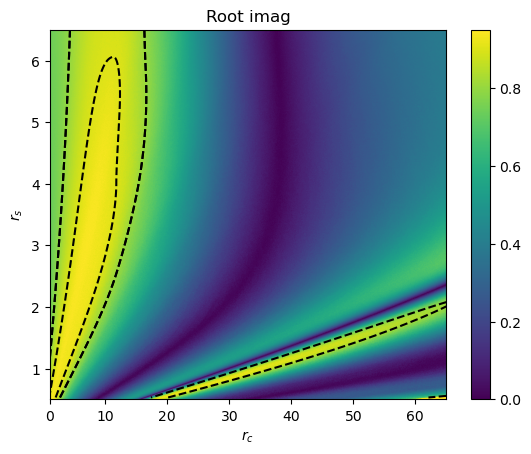

In [62]:
fig, ax = plt.subplots()
im = ax.imshow(
    np.abs(sensitivity_real.imag / pole_grid.imag)[5:],
    extent=(R_CORE[0, 0], R_CORE[0, -1], R_SHELL[0, 0], R_SHELL[-1, 0]),
    origin="lower",
    vmin=0,
    vmax=0.95
)
ax.set_aspect("auto")
ax.set_title(r"Root imag")
ax.set_xlabel(r"$r_c$")
ax.set_ylabel(r"$r_s$")
cbar = fig.colorbar(im, ax=ax)
contour_levels = [5,6,7,8, 9, 10, 11]
# contours = ax.contour(
#     R_CORE,
#     R_SHELL,
#     np.abs(sensitivity_data.real / pole_grid.imag),
#     levels=contour_levels,  # Set the number of contour levels, or define specific levels
#     colors="black",  # Set contour color
#     linestyles="dashed",
# )
# print(f"r core: {r_core_min}   {r_core_max}")
# print(f"r shell: {r_shell_min}   {r_shell_max}")
# u, v = np.where(np.isclose(np.abs(sensitivity_data.real / pole_grid.imag), np.max(np.abs(sensitivity_data.real / pole_grid.imag))))
# u, v = u[0], v[0]
# print(u, v)
# print(f"r_core = {R_CORE[u,v]}")
# print(f"r_shell = {R_SHELL[u,v]}")
# print(f"pole = {pole_grid[u,v]/1e7}")
# cross_x = R_CORE[u,v]
# cross_y = R_SHELL[u,v]
# ax.plot(cross_x, cross_y, marker='o', markersize=7, color='black', markeredgewidth=1.5)  # Plot 'x' at the desired point
# # ax.plot([r_core_min, cross_x], [cross_y, cross_y], color='red', linewidth=1)  # Left horizontal
# # ax.plot([cross_x, cross_x], [r_shell_min, cross_y], color='red', linewidth=1)  # Left horizontal
# r_core_optimal_ws = R_CORE[u,v]
# r_shell_optimal_ws = R_SHELL[u,v]

# l = 2*np.pi/pole_grid[u,v].real
# print(f"l = {l/1e-9}")
# print(np.max(np.abs(sensitivity_data.real / pole_grid.imag)))

ax.set_xticks(np.array([0.1,1,2,3,4,5,6])*1e-8)
ax.set_xticklabels(["0","10","20","30","40","50","60"])
ax.set_yticks(np.array([1,2,3,4,5,6])*1e-9)
ax.set_yticklabels(["1","2","3","4","5","6"])

contour_levels = [0.8, 0.9]
contour_colors= ["black", "black"]
up_lim=250
contours = ax.contour(
    R_CORE[5:,0:up_lim],
    R_SHELL[5:,0:up_lim],
    plot_data[:,0:up_lim],
    levels=contour_levels,  # Set the number of contour levels, or define specific levels
    colors=contour_colors,  # Set contour color
    linestyles="dashed",
)
contour_levels = [0.8]
contour_colors= ["black"]
up_lim=250
contours = ax.contour(
    R_CORE[5:],
    R_SHELL[5:],
    plot_data,
    levels=contour_levels,  # Set the number of contour levels, or define specific levels
    colors=contour_colors,  # Set contour color
    linestyles="dashed",
)

# # Plot mini
# mini_d = 0.5
# mini_x = R_CORE[int(u*mini_d), int(v*mini_d)]
# mini_y = R_SHELL[int(u*mini_d), int(v*mini_d)]
# ax.plot(mini_x, mini_y, marker='v', markersize=7, color='darkred', markeredgewidth=1.5)  # Plot 'x' at the desired point

# # Plot mega
# mega_d = 1.75
# mega_x = R_CORE[int(u*mega_d), int(v*mega_d)]
# mega_y = R_SHELL[int(u*mega_d), int(v*mega_d)]
# ax.plot(mega_x, mega_y, marker='^', markersize=7, color='darkred', markeredgewidth=1.5)  # Plot 'x' at the desired point

plt.savefig('fomdirect_imag.svg', dpi=300, bbox_inches='tight')
